# Packages

In [1]:
# Standard Python packages
import pandas as pd
import numpy as np
import collections
from IPython.display import display, display_html

# Standard plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Import other jupyter notebooks
from ipynb.fs.full.functions_data_manipulation import *

sns.set_style("whitegrid")

# Reading Data

In [2]:
# read in meta data
meta = pd.read_csv("meta_data.csv")
display_html(meta)

,Sample,Site,Year,k13Class,crt_class
0,PD0498-C,ETH,2011,R539T,no_nea
1,PD0500-C,ETH,2011,C580Y,no_nea
2,PD0501-C,ETH,2011,C580Y,no_nea
3,PD0502-C,ETH,2011,R539T,no_nea
4,PD0575-C,ETH,2012,R539T,no_nea
...,...,...,...,...,...
1463,RCN13097,NEKH,2017,C580Y,T93S
1464,RCN13098,NEKH,2017,C580Y,T93S
1465,RCN13100,NEKH,2018,C580Y,T93S
1466,RCN13101,NEKH,2018,WT,H97Y


In [3]:
meta['crt_class'].unique()

array(['no_nea', 'het', 'F145I', 'I218F', 'H97Y', 'missing', 'T93S',
       'noCRT', 'H97L', 'M343I'], dtype=object)

In [4]:
# Main data, rename 'Probability_of_edge' to 'weight' so it is recognised as weight attribute
data = pd.read_csv("kelch_IBD_graph.csv")
data = data.rename(columns = {'Probability_of_edge':'weight', 'V1': 'source', 'V2': 'target'})

# get parasite types
codes, parasites = pd.factorize(np.concatenate((data['source'], data['target'])))
    
n = 1468            # number of parasites
n1 = data.shape[0]  # number of non-zero entries in adjacency metrix (upper triangular part) (1076778)

# add column, where parasites are indices from 0 to 1467
data['source_ind'] = codes[0:n1]
data['target_ind'] = codes[n1:(2*n1)]
data['type'] = 'undirected'

data = data.reindex(['source', 'target', 'source_ind', 'target_ind', 'weight', 'type'], axis = 1)
display(data)

,source,target,source_ind,target_ind,weight,type
0,PD0498-C,PD0500-C,0,1,0.000003,undirected
1,PD0498-C,PD0501-C,0,2,0.000004,undirected
2,PD0498-C,PD0502-C,0,3,1.000000,undirected
3,PD0498-C,PD0575-C,0,4,1.000000,undirected
4,PD0498-C,PD0578-C,0,5,0.966176,undirected
...,...,...,...,...,...,...
1076773,RCN13098,RCN13101,1464,1466,0.000124,undirected
1076774,RCN13098,RCN13103,1464,1467,0.999985,undirected
1076775,RCN13100,RCN13101,1465,1466,0.000391,undirected
1076776,RCN13100,RCN13103,1465,1467,0.880700,undirected


# EDA of Data

## SNP Data

In [7]:
display(pd.read_csv("SNP_data_kevin.csv"))
display(pd.read_csv("SNP_meta_data_kevin.csv"))

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177
0,PD0498-C,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,PD0500-C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,PD0501-C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,PD0502-C,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,PD0575-C,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,RCN13097,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1464,RCN13098,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1465,RCN13100,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1466,RCN13101,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


,Chr,Pos
0,Pf3D7_13_v3,1696935
1,Pf3D7_13_v3,1697657
2,Pf3D7_13_v3,1697824
3,Pf3D7_13_v3,1697886
4,Pf3D7_13_v3,1697887
...,...,...
172,Pf3D7_13_v3,1752074
173,Pf3D7_13_v3,1752157
174,Pf3D7_13_v3,1752713
175,Pf3D7_13_v3,1752740


## Meta Data EDA

In [23]:
def save_barplot(data, str_col, ylabel, title, save_name, fontsize = 18):
    '''Function to generate barplots with labels, to be saved in a specified folder'''
    # set figure size
    plt.figure(figsize = (9,5))
    
    # Main plot
    ax = sns.countplot(x = str_col, data = data)
    
    # Add labels
    ax.set_xlabel(xlabel = str_col, fontsize = fontsize)
    ax.set_ylabel(ylabel = ylabel, fontsize = fontsize)
    
    # Add numbers
    for i,p in enumerate(ax.patches):
        ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+1))
    
    plt.savefig(save_name, dpi = 400, bbox_inches = 'tight')

def save_2way(grouped, xlabel, ylabel, title, save_name, fontsize = 18):
    '''Function to generate 2 way table with labels, to be saved in a specified folder'''
    plt.figure(figsize=(10,10))
    ax = sns.heatmap(grouped, annot = True, fmt = 'd')
    ax.set_xlabel(xlabel = xlabel, fontsize = fontsize)
    ax.set_ylabel(ylabel = ylabel, fontsize = fontsize)
    
    plt.xticks(rotation = 60); plt.yticks(rotation = 0)
    plt.savefig(save_name, dpi = 400, bbox_inches = 'tight')

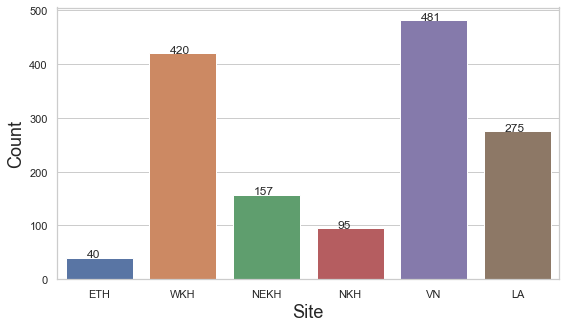

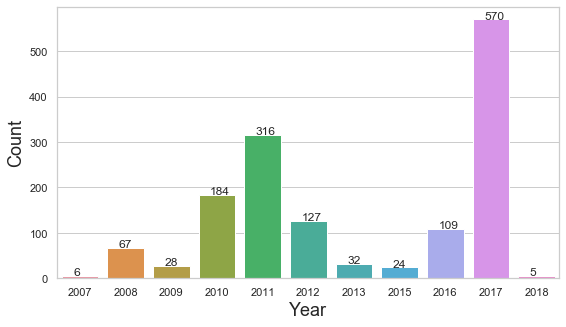

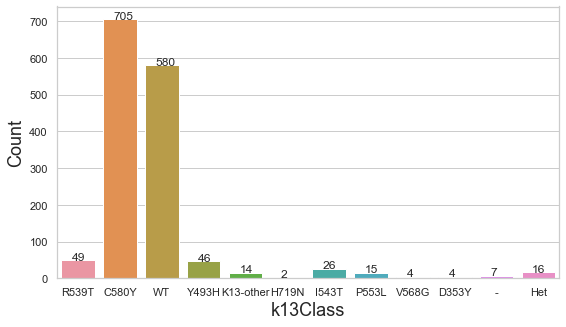

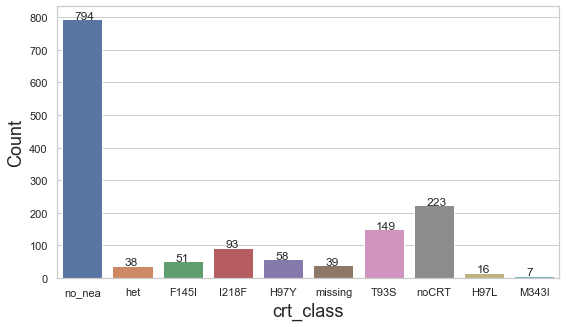

In [24]:
save_barplot(meta, 'Site', 'Count', "No. of malaria parasites, by region", "Latex/Chapter2/meta_site.png")
save_barplot(meta, 'Year', 'Count', "No. of malaria parasites, by year", "Latex/Chapter2/meta_year.png")
save_barplot(meta, 'k13Class', 'Count', "No. of malaria parasites, by kelch13 mutation", "Latex/Chapter2/meta_k13.png")
save_barplot(meta, 'crt_class', 'Count', "No. of malaria parasites, by CRT mutation", "Latex/Chapter2/meta_crt.png")

In [20]:
# Two way tables
grouped_year_k13 = pd.crosstab(index = meta["Year"], columns=meta["k13Class"])
grouped_crt_k13 = pd.crosstab(index = meta["crt_class"], columns=meta["k13Class"])

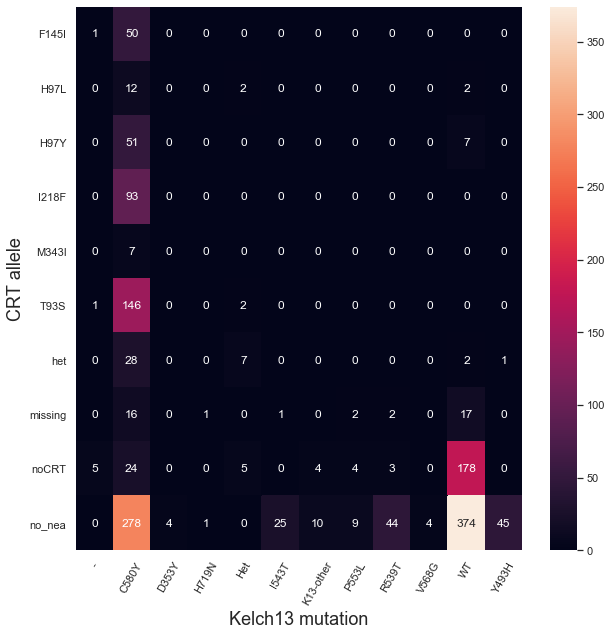

In [26]:
save_2way(grouped_crt_k13,
          xlabel = 'Kelch13 mutation',
          ylabel = 'CRT allele',
          title = 'Two-way plot of CRT class and Kelch13 mutation',
          save_name = "Latex/Chapter2/meta_2way.png")

## Distance Matrix

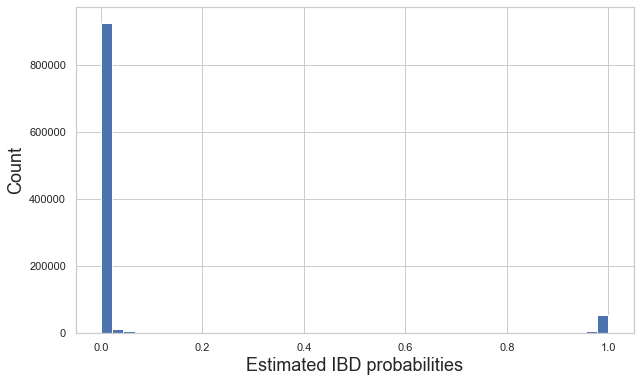

In [38]:
fontsize = 18
plt.figure(figsize=(10,6))
plt.hist(data['weight'], bins = 45)
plt.xlabel("Estimated IBD probabilities", fontsize = fontsize)
plt.ylabel("Count", fontsize = fontsize)
plt.savefig("Latex/Chapter2/data_prob_hist.png", dpi = 400, bbox_inches = 'tight')

In [50]:
import scipy.cluster.hierarchy as sch
linkage = sch.linkage(squareform(1-data['weight']), method='single')

/Users/kevinlam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


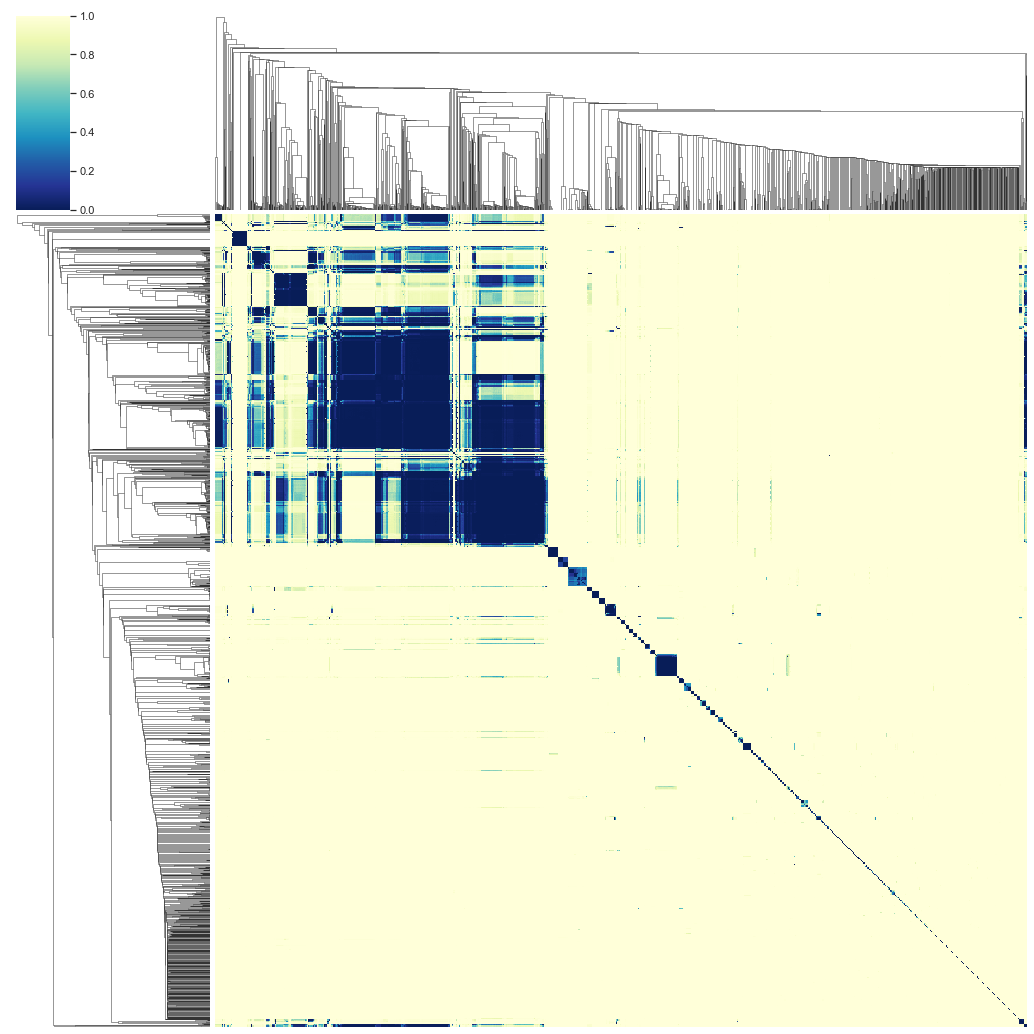

In [51]:
fontsize = 25

g = sns.clustermap(squareform(1-data['weight']), row_linkage=linkage, col_linkage=linkage,
                   cmap = 'YlGnBu_r', figsize = (15,15))
ax = g.ax_heatmap
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.savefig("Latex/Chapter2/data_adjacency.png", dpi = 400, bbox_inches = 'tight')